In [64]:
from openpyxl import load_workbook
import pandas as pd

In [65]:
df = pd.read_csv('kapal_penumpang.csv')
df

,tanggal,pelabuhan,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
0,2020-06-01,MUARA ANGKE,1,0,9,0
1,2020-06-02,MUARA ANGKE,0,1,0,22
2,2020-06-03,MUARA ANGKE,1,0,11,0
3,2020-06-04,MUARA ANGKE,0,1,0,44
4,2020-06-05,MUARA ANGKE,0,0,0,0
...,...,...,...,...,...,...
295,2020-06-26,SABIRA,1,1,8,8
296,2020-06-27,SABIRA,0,1,0,12
297,2020-06-28,SABIRA,1,0,12,0
298,2020-06-29,SABIRA,1,2,0,23


In [66]:
df.drop(df.index[101:299], inplace = True)
df

,tanggal,pelabuhan,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
0,2020-06-01,MUARA ANGKE,1,0,9,0
1,2020-06-02,MUARA ANGKE,0,1,0,22
2,2020-06-03,MUARA ANGKE,1,0,11,0
3,2020-06-04,MUARA ANGKE,0,1,0,44
4,2020-06-05,MUARA ANGKE,0,0,0,0
...,...,...,...,...,...,...
97,2020-06-08,LANCANG,2,2,20,30
98,2020-06-09,LANCANG,2,2,13,16
99,2020-06-10,LANCANG,3,3,16,32
100,2020-06-11,LANCANG,4,4,17,23


In [67]:
df.isna().sum()

tanggal            0
pelabuhan          0
kapal_berangkat    0
kapal_tiba         0
penumpang_naik     0
penumpang_turun    0
dtype: int64

In [68]:
d_train = df[['penumpang_naik','penumpang_turun']].reset_index(drop=True)
d_train

,penumpang_naik,penumpang_turun
0,9,0
1,0,22
2,11,0
3,0,44
4,0,0
...,...,...
97,20,30
98,13,16
99,16,32
100,17,23


In [69]:
#import library yang akan digunakan
from IPython.display import Image
from sklearn.impute import SimpleImputer
from sklearn import tree
from subprocess import check_call
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

In [70]:
d_train = df[['penumpang_naik','penumpang_turun']].reset_index(drop=True)
d_train

,penumpang_naik,penumpang_turun
0,9,0
1,0,22
2,11,0
3,0,44
4,0,0
...,...,...
97,20,30
98,13,16
99,16,32
100,17,23


In [71]:
for index, row in d_train.iterrows():
    if row['penumpang_naik'] < 100:
        d_train.loc[index, 'Status'] = 'Normal'
    elif row['penumpang_naik'] <= 125:
        d_train.loc[index, 'Status'] = 'sedang'
    else:
        d_train.loc[index, 'Status'] = 'tinggi'
d_train

,penumpang_naik,penumpang_turun,Status
0,9,0,Normal
1,0,22,Normal
2,11,0,Normal
3,0,44,Normal
4,0,0,Normal
...,...,...,...
97,20,30,Normal
98,13,16,Normal
99,16,32,Normal
100,17,23,Normal


In [72]:
y = d_train['Status'].values
y

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'tinggi', 'Normal', 'sedang', 'Normal', 'Normal', 'Normal',
       'Normal', 'tinggi', 'tinggi', 'sedang', 'Normal', 'sedang',
       'sedang', 'tinggi', 'tinggi', 'tinggi', 'tinggi', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'tinggi', 'tinggi', 'tinggi', 'tinggi', 'tinggi', 'tinggi',
       'sedang', 'tinggi', 'tinggi', 'tinggi', 'tinggi', 'tinggi',
       'tinggi', 'tinggi', 'tinggi', 'tinggi', 'tinggi', 'ting

In [73]:
columns = ['penumpang_naik', 'penumpang_turun']
features = d_train[list(columns)].values
features

array([[   9,    0],
       [   0,   22],
       [  11,    0],
       [   0,   44],
       [   0,    0],
       [   0,    0],
       [   0,    0],
       [  43,   42],
       [  38,   57],
       [  33,   45],
       [  38,   62],
       [  48,   57],
       [ 133,   62],
       [  72,  123],
       [ 100,   66],
       [  56,   62],
       [  95,   73],
       [  53,  117],
       [  81,   84],
       [ 421,   84],
       [ 133,  267],
       [ 110,  126],
       [  92,  141],
       [ 110,   76],
       [ 113,  111],
       [ 217,  133],
       [ 645,  131],
       [ 167,  640],
       [ 236,  228],
       [  47,   54],
       [   0,    0],
       [  31,   25],
       [   0,    0],
       [   0,    0],
       [   0,    0],
       [   0,    0],
       [   0,    0],
       [   0,    0],
       [   0,    0],
       [   0,    0],
       [   0,    0],
       [   0,    0],
       [   0,    0],
       [   0,    0],
       [   0,    0],
       [   0,    0],
       [   0,    0],
       [   0,

In [74]:
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=0, copy=True)
x = imputer.fit_transform(features)
x

array([[9.000e+00, 0.000e+00],
       [0.000e+00, 2.200e+01],
       [1.100e+01, 0.000e+00],
       [0.000e+00, 4.400e+01],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [4.300e+01, 4.200e+01],
       [3.800e+01, 5.700e+01],
       [3.300e+01, 4.500e+01],
       [3.800e+01, 6.200e+01],
       [4.800e+01, 5.700e+01],
       [1.330e+02, 6.200e+01],
       [7.200e+01, 1.230e+02],
       [1.000e+02, 6.600e+01],
       [5.600e+01, 6.200e+01],
       [9.500e+01, 7.300e+01],
       [5.300e+01, 1.170e+02],
       [8.100e+01, 8.400e+01],
       [4.210e+02, 8.400e+01],
       [1.330e+02, 2.670e+02],
       [1.100e+02, 1.260e+02],
       [9.200e+01, 1.410e+02],
       [1.100e+02, 7.600e+01],
       [1.130e+02, 1.110e+02],
       [2.170e+02, 1.330e+02],
       [6.450e+02, 1.310e+02],
       [1.670e+02, 6.400e+02],
       [2.360e+02, 2.280e+02],
       [4.700e+01, 5.400e+01],
       [0.000e+00, 0.000e+00],
       [3.100e+01, 2.500e+01],
       [

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [76]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)

In [77]:
with open("Graph_tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, feature_names = columns, filled=True, rounded=True, special_characters = True)

In [78]:
check_call(['dot', '-Tpng', 'Graph_tree.dot', '-o', 'Graph_tree.png'])

0

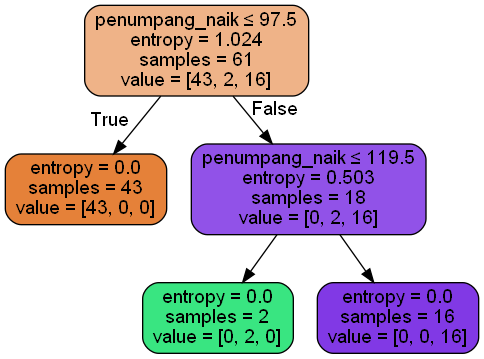

In [79]:
Image(filename='Graph_tree.png')

<function matplotlib.pyplot.show(*args, **kw)>

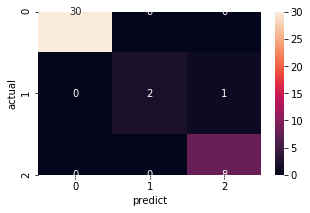

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='.0f', ax=ax)
plt.xlabel("predict")
plt.ylabel("actual")
plt.show

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        30
      sedang       1.00      0.67      0.80         3
      tinggi       0.89      1.00      0.94         8

    accuracy                           0.98        41
   macro avg       0.96      0.89      0.91        41
weighted avg       0.98      0.98      0.97        41



In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.975609756097561